In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("advertising_data.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,65.40,33,66699.12,247.31,Adaptive 24hour Graphic Interface,Sylviaview,0,Palau,02-12-2016 22:51,0
1,73.30,36,68211.35,135.72,Adaptive asynchronous attitude,West Tanya,1,Hungary,1/30/2016 4:38,1
2,44.57,31,38349.78,133.17,Adaptive context-sensitive application,Joneston,1,China,3/27/2016 9:11,1
3,62.06,44,44174.25,105.00,Adaptive contextually-based methodology,Port Paultown,0,Austria,04-12-2016 14:01,1
4,63.80,38,36037.33,108.70,Adaptive demand-driven knowledgebase,Colebury,1,Tuvalu,3/19/2016 0:27,1


data cleaning

In [3]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55868.450080,180.000100,0.481000,0.50000
std,15.853615,8.785562,26295.327717,43.902339,0.499889,0.50025
min,32.600000,19.000000,1000.540000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47117.162500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57023.600000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65497.567500,218.792500,1.000000,1.00000
max,91.430000,61.000000,713841.570000,269.960000,1.000000,1.00000


<Axes: >

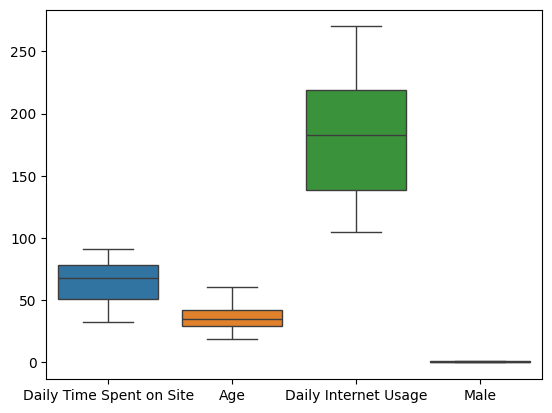

In [4]:
sns.boxplot(df[["Daily Time Spent on Site","Age","Daily Internet Usage","Male"]])

<Axes: ylabel='Area Income'>

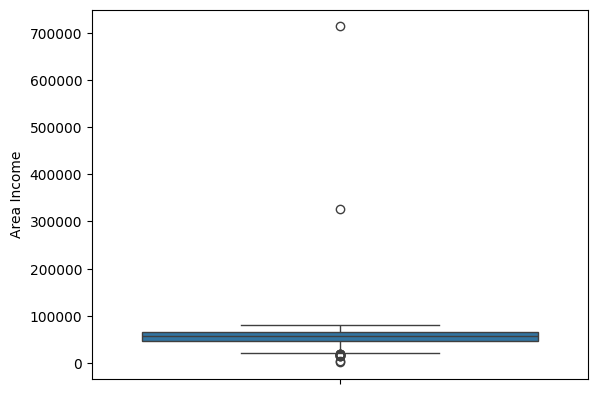

In [5]:
sns.boxplot(df["Area Income"])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,65.40,33,66699.12,247.31,Adaptive 24hour Graphic Interface,Sylviaview,0,Palau,02-12-2016 22:51,0
1,73.30,36,68211.35,135.72,Adaptive asynchronous attitude,West Tanya,1,Hungary,1/30/2016 4:38,1
2,44.57,31,38349.78,133.17,Adaptive context-sensitive application,Joneston,1,China,3/27/2016 9:11,1
3,62.06,44,44174.25,105.00,Adaptive contextually-based methodology,Port Paultown,0,Austria,04-12-2016 14:01,1
4,63.80,38,36037.33,108.70,Adaptive demand-driven knowledgebase,Colebury,1,Tuvalu,3/19/2016 0:27,1
...,...,...,...,...,...,...,...,...,...,...
982,75.24,24,52252.91,226.49,Vision-oriented next generation solution,South Christopher,0,Vanuatu,2/25/2016 16:33,0
983,33.52,43,42191.61,165.56,Vision-oriented optimizing middleware,Jessicahaven,0,Cambodia,05-09-2016 21:54,1
984,80.64,26,46974.15,221.59,Vision-oriented real-time framework,North Laurenview,0,Luxembourg,5/24/2016 10:04,0
985,51.58,33,49822.78,115.91,Vision-oriented system-worthy forecast,Johnsontown,0,Brunei Darussalam,4/24/2016 13:46,1


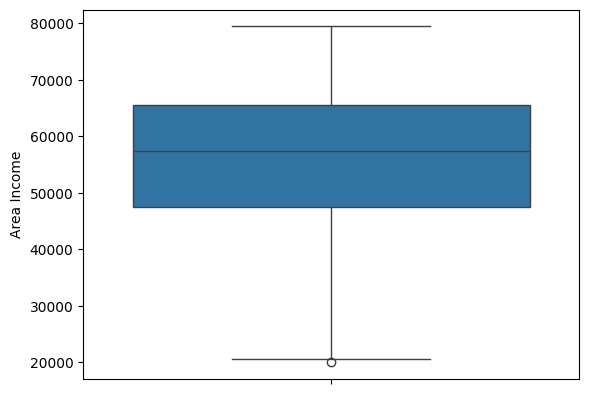

In [6]:
def remove_outliers(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  low_L=q1-1.5*IQR
  upper_l=q3+1.5*IQR
  data=df[((df>=low_L)&(df<=upper_l))]
  return data

df["Area Income"]=remove_outliers(df["Area Income"])
sns.boxplot(df["Area Income"])
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df


In [7]:
data=df.drop(df[["Timestamp","Ad Topic Line","City","Country"]],axis="columns")
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,65.40,33,66699.12,247.31,0,0
1,73.30,36,68211.35,135.72,1,1
2,44.57,31,38349.78,133.17,1,1
3,62.06,44,44174.25,105.00,0,1
4,63.80,38,36037.33,108.70,1,1
...,...,...,...,...,...,...
982,75.24,24,52252.91,226.49,0,0
983,33.52,43,42191.61,165.56,0,1
984,80.64,26,46974.15,221.59,0,0
985,51.58,33,49822.78,115.91,0,1


In [8]:
data.isnull().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Male,0
Clicked on Ad,0


EDA


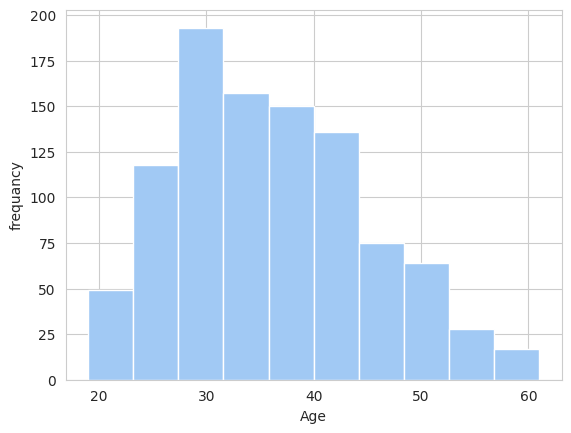

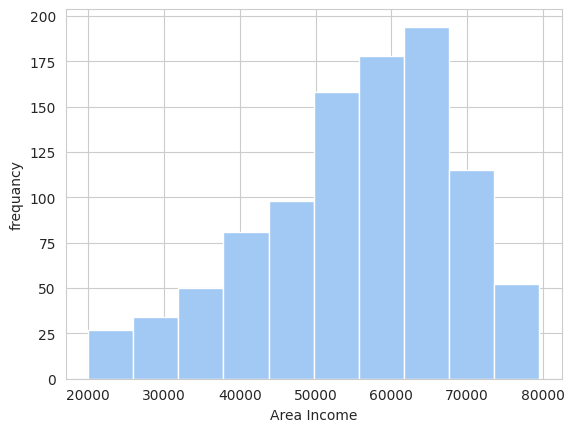

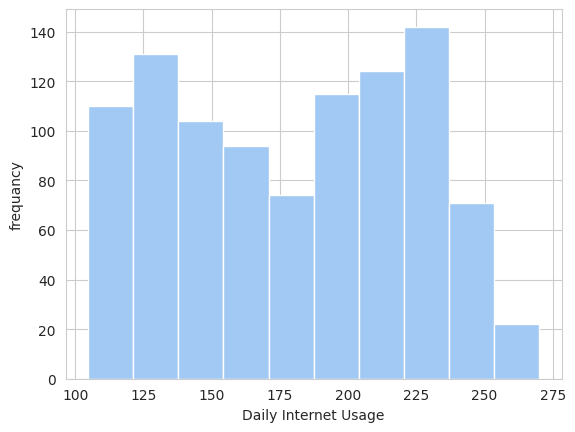

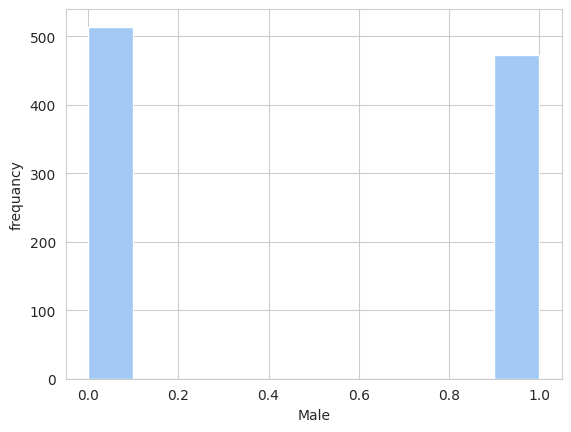

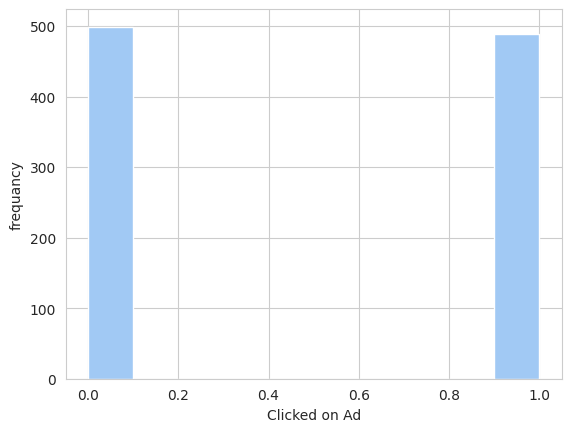

In [9]:
a=["Age","Area Income","Daily Internet Usage","Male","Clicked on Ad"]
sns.set_palette("pastel")
sns.set_style('whitegrid')
for i in a:
  plt.hist(data[i])
  plt.xlabel(i)
  plt.ylabel("frequancy")
  plt.show()


In [10]:
data1=data[data["Clicked on Ad"]==0]
data2=data[data["Clicked on Ad"]==1]

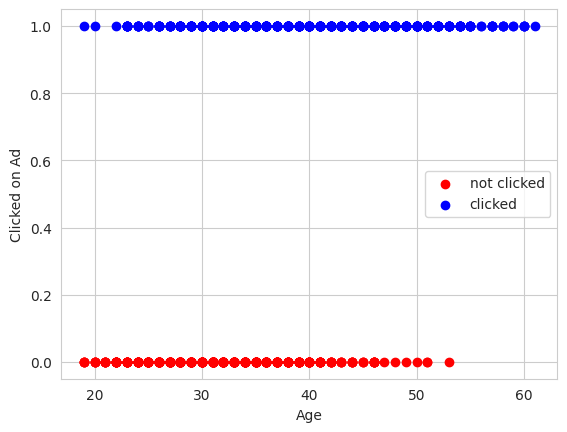

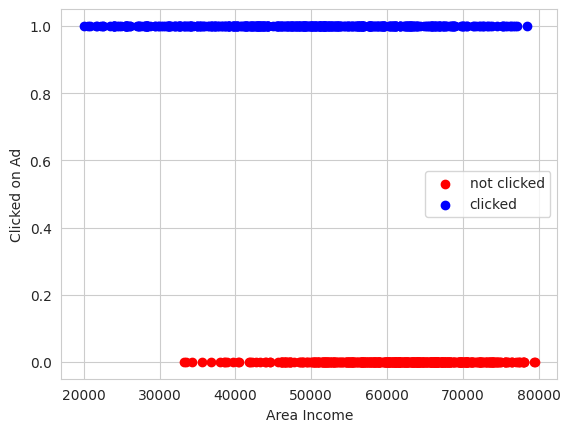

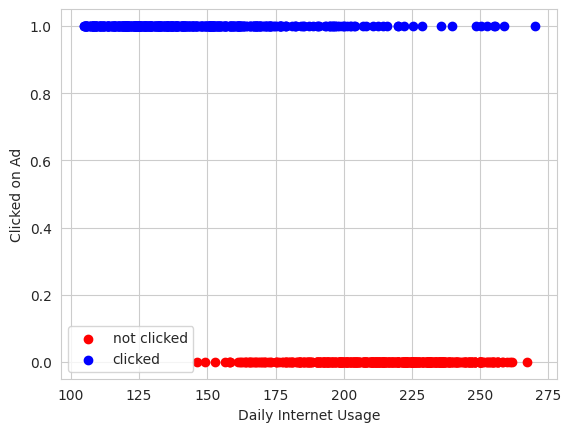

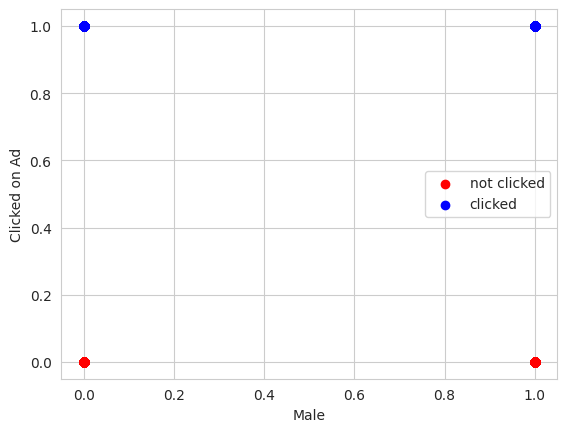

In [11]:
a=["Age","Area Income","Daily Internet Usage","Male"]
for i in a:
  plt.scatter(data1[i],data1["Clicked on Ad"],color="red",label="not clicked")
  plt.scatter(data2[i],data2["Clicked on Ad"],color="blue",label="clicked")
  plt.legend()
  plt.xlabel(i)
  plt.ylabel("Clicked on Ad")
  plt.show()

In [12]:
dt=data.drop(["Clicked on Ad"],axis="columns")
dt

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,65.40,33,66699.12,247.31,0
1,73.30,36,68211.35,135.72,1
2,44.57,31,38349.78,133.17,1
3,62.06,44,44174.25,105.00,0
4,63.80,38,36037.33,108.70,1
...,...,...,...,...,...
982,75.24,24,52252.91,226.49,0
983,33.52,43,42191.61,165.56,0
984,80.64,26,46974.15,221.59,0
985,51.58,33,49822.78,115.91,0


<Axes: >

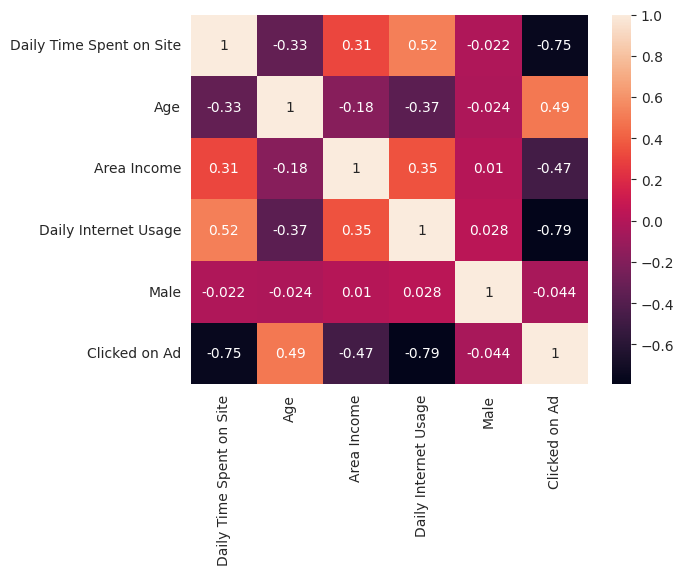

In [13]:
cr=data.corr()
sns.heatmap(cr,annot=True)

min max scalar

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [36]:
x=data.drop(["Clicked on Ad"],axis="columns")
y=data["Clicked on Ad"]
y

,Clicked on Ad
0,0
1,1
2,1
3,1
4,1
...,...
982,0
983,1
984,0
985,1


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x["area_income_scaled"]=scaler.fit_transform(x[["Area Income"]])
x["Age_scaled"]=scaler.fit_transform(x[["Age"]])
x=x.drop(["Age","Area Income"],axis=1)
x

,Daily Time Spent on Site,Daily Internet Usage,Male,area_income_scaled,Age_scaled
0,65.40,247.31,0,0.785090,0.333333
1,73.30,135.72,1,0.810508,0.404762
2,44.57,133.17,1,0.308575,0.285714
3,62.06,105.00,0,0.406476,0.595238
4,63.80,108.70,1,0.269705,0.452381
...,...,...,...,...,...
982,75.24,226.49,0,0.542268,0.119048
983,33.52,165.56,0,0.373151,0.571429
984,80.64,221.59,0,0.453539,0.166667
985,51.58,115.91,0,0.501421,0.333333


In [17]:

para={"para_regg":{"C":[1,10,20,30],"penalty":["l1","l2"],"max_iter":[50,100,200,300],"solver":["liblinear", "lbfgs," "saga"]},
      "para_dec":{"criterion":["gini","entropy"],"max_depth":[None,10,5,20],"max_features":[None,1,2]},
      "para_ran":{"n_estimators":[10,20,50,100,500],"max_depth":[2,50,100,200,500]},
      "para_SVM":{"C":[1,2,5,10,20,50],"kernel":["linear","poly","rbf"]}
      }

In [18]:
clf_reg=GridSearchCV(LogisticRegression(),para.get("para_regg"),cv=10)
clf_reg.fit(x,y)


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20, 30], 'max_iter': [50, 100, 200, 300],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs,saga']})

In [19]:
p=round(clf_reg.best_score_,3)
p

0.971

In [20]:
a=clf_reg.best_params_
a

{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

In [21]:
clf_dec=GridSearchCV(tree.DecisionTreeClassifier(),para.get("para_dec"),cv=10)
clf_dec.fit(x,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 5, 20],
                         'max_features': [None, 1, 2]})

In [22]:
q=round(clf_dec.best_score_,3)
q

0.958

In [23]:
b=clf_dec.best_params_
b

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None}

In [24]:
clf_ran=GridSearchCV(RandomForestClassifier(),para.get("para_ran"),cv=10)
clf_ran.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 50, 100, 200, 500],
                         'n_estimators': [10, 20, 50, 100, 500]})

In [25]:
r=round(clf_ran.best_score_,3)
r

0.966

In [26]:
c=clf_ran.best_params_
c

{'max_depth': 200, 'n_estimators': 50}

In [27]:
clf_SVM=GridSearchCV(SVC(),para.get("para_SVM"),cv=10)
clf_SVM.fit(x,y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 5, 10, 20, 50],
                         'kernel': ['linear', 'poly', 'rbf']})

In [28]:
s=round(clf_SVM.best_score_,3)
s

0.973

In [29]:
d=clf_SVM.best_params_
d

{'C': 1, 'kernel': 'linear'}

In [30]:
from tabulate import tabulate
LIST_=[["Logistic Regression",a,p],["DecisionTreeClassifier",b,q],
 ["RandomForestClassifier",c,r],["SVC",d,s]]
headers=["MODEL","BEST PARAMETER","ACCURACY"]
print(tabulate(LIST_, headers=headers, tablefmt="grid"))



+------------------------+-------------------------------------------------------------------+------------+
| MODEL                  | BEST PARAMETER                                                    |   ACCURACY |
+========================+===================================================================+============+
| Logistic Regression    | {'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'} |      0.971 |
+------------------------+-------------------------------------------------------------------+------------+
| DecisionTreeClassifier | {'criterion': 'entropy', 'max_depth': 5, 'max_features': None}    |      0.958 |
+------------------------+-------------------------------------------------------------------+------------+
| RandomForestClassifier | {'max_depth': 200, 'n_estimators': 50}                            |      0.966 |
+------------------------+-------------------------------------------------------------------+------------+
| SVC                    | {

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
y_train

,Clicked on Ad
359,1
156,0
446,1
965,1
585,0
...,...
924,0
223,1
271,0
474,0


In [66]:
model=SVC(C= 1, kernel='linear')
model.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [67]:
model.score(x_test,y_test)

0.9696969696969697

Text(50.722222222222214, 0.5, 'Truth')

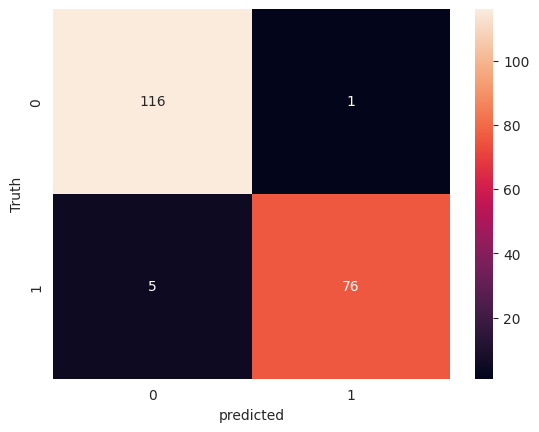

In [68]:
y_predict=model.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("predicted")
plt.ylabel("Truth")

In [72]:
from sklearn.metrics import classification_report
cl=classification_report(y_test,y_predict)
print(cl)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       117
           1       0.99      0.94      0.96        81

    accuracy                           0.97       198
   macro avg       0.97      0.96      0.97       198
weighted avg       0.97      0.97      0.97       198

